# Fund Portfolio Analysis

## Current Portfolio
| Fund | Value (NOK) | % | Ticker |
|------|-------------|---|--------|
| DNB Teknologi A | 53,763 | 58.3% | 0P00000MVB.IR |
| DNB Global EM Indeks | 20,870 | 22.6% | 0P0001CTKY.IR |
| JPMorgan China | 15,576 | 16.9% | 0P0000MXQM.SI |
| DNB Norge A | 2,060 | 2.2% | 0P0001EFNB.IR |
| **Cash to invest** | **58,000** | - | - |

In [2]:
%pip install yfinance pandas numpy matplotlib seaborn -q

Note: you may need to restart the kernel to use updated packages.


In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries loaded!")

Libraries loaded!


## Fetch Historical Data

In [4]:
# Define funds with their tickers and current holdings
funds = {
    'DNB Teknologi': {'ticker': '0P00000MVB.IR', 'value': 53763},
    'DNB EM Indeks': {'ticker': '0P0001CTKY.IR', 'value': 20870},
    'JPM China': {'ticker': '0P0000MXQM.SI', 'value': 15576},
    'DNB Norge': {'ticker': '0P0001EFNB.IR', 'value': 2060},
}

start_date = '2018-04-01'
end_date = datetime.now().strftime('%Y-%m-%d')

fund_data = {}
for name, info in funds.items():
    print(f"Fetching {name}...")
    ticker = yf.Ticker(info['ticker'])
    hist = ticker.history(start=start_date, end=end_date)
    
    if len(hist) > 0:
        series = hist['Close'].copy()
        series.index = series.index.date
        fund_data[name] = series
        print(f"  ✅ {len(hist)} data points from {series.index[0]} to {series.index[-1]}")
    else:
        print(f"  ❌ No data found")

prices = pd.DataFrame(fund_data)
prices.index = pd.to_datetime(prices.index)
print(f"\nCombined DataFrame shape: {prices.shape}")

Fetching DNB Teknologi...
  ✅ 915 data points from 2022-03-07 to 2026-01-07
Fetching DNB EM Indeks...
  ✅ 904 data points from 2022-03-07 to 2026-01-07
Fetching JPM China...
  ✅ 822 data points from 2022-03-07 to 2026-01-07
Fetching DNB Norge...
  ✅ 946 data points from 2022-03-07 to 2026-01-07

Combined DataFrame shape: (968, 4)


In [5]:
# Clean data: forward-fill gaps, drop remaining NaN
prices_clean = prices.ffill().dropna()
print(f"Clean dataset: {len(prices_clean)} trading days")
print(f"Date range: {prices_clean.index[0].strftime('%Y-%m-%d')} to {prices_clean.index[-1].strftime('%Y-%m-%d')}")

Clean dataset: 968 trading days
Date range: 2022-03-07 to 2026-01-07


## Personal Transaction History

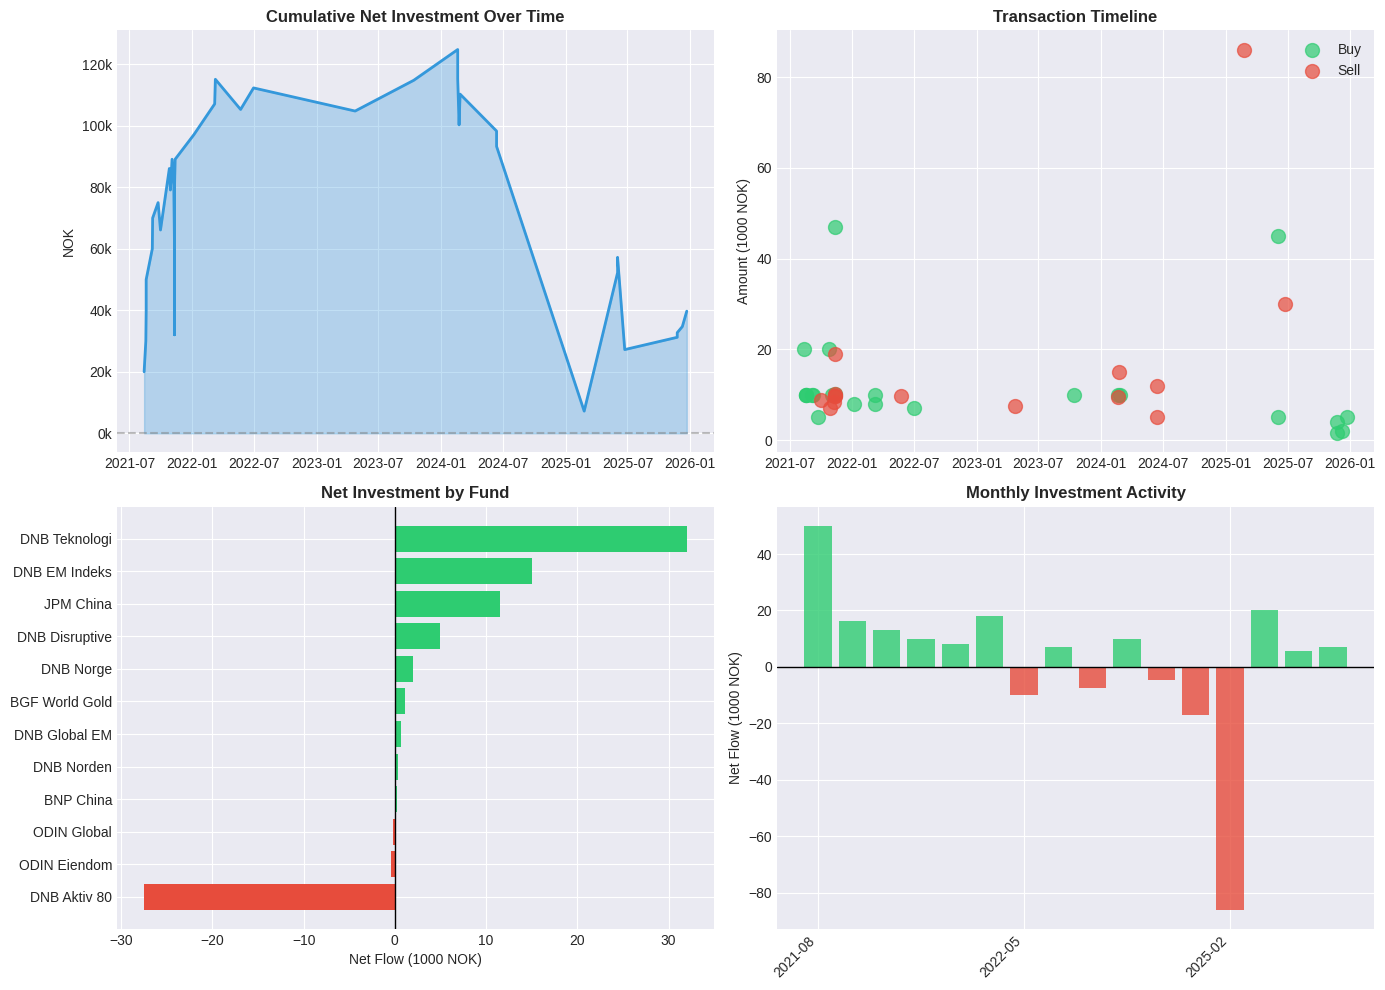

4.4 years | 39 transactions | 288k bought | 248k sold | 40k net invested


In [6]:
# Transaction history (positive = buy, negative = sell)
transactions = [
    ('2021-08-13', 'DNB Teknologi', 20000), ('2021-08-18', 'DNB Global EM', 10000),
    ('2021-08-19', 'DNB Norden', 10000), ('2021-08-19', 'ODIN Eiendom', 10000),
    ('2021-09-06', 'ODIN Global', 10000), ('2021-09-07', 'BGF World Gold', 10000),
    ('2021-09-23', 'ODIN Eiendom', 5000), ('2021-09-30', 'BGF World Gold', -8902),
    ('2021-10-26', 'DNB Aktiv 80', 20000), ('2021-10-29', 'ODIN Eiendom', -6999),
    ('2021-11-03', 'DNB Aktiv 80', 10000), ('2021-11-08', 'ODIN Eiendom', -8470),
    ('2021-11-10', 'DNB Teknologi', -19002), ('2021-11-10', 'DNB Norden', -9628),
    ('2021-11-10', 'DNB Global EM', -9796), ('2021-11-10', 'ODIN Global', -10178),
    ('2021-11-10', 'DNB Aktiv 80', 46896), ('2021-11-12', 'DNB Aktiv 80', 10178),
    ('2022-01-06', 'DNB Global EM', 8000), ('2022-03-08', 'BNP China', 10000),
    ('2022-03-10', 'DNB Aktiv 80', 8000), ('2022-05-23', 'BNP China', -9809),
    ('2022-06-30', 'DNB Teknologi', 7000), ('2023-04-24', 'DNB Global EM', -7518),
    ('2023-10-13', 'DNB Teknologi', 10000), ('2024-02-19', 'DNB EM Indeks', 10000),
    ('2024-02-19', 'DNB Aktiv 80', -9500), ('2024-02-23', 'DNB Aktiv 80', -15000),
    ('2024-02-26', 'JPM China', 10000), ('2024-06-12', 'DNB Teknologi', -5000),
    ('2024-06-12', 'DNB Aktiv 80', -12000), ('2025-02-24', 'DNB Aktiv 80', -86060),
    ('2025-06-02', 'DNB Teknologi', 45000), ('2025-06-02', 'DNB EM Indeks', 5000),
    ('2025-06-23', 'DNB Teknologi', -30000), ('2025-11-24', 'DNB Teknologi', 4000),
    ('2025-11-24', 'JPM China', 1500), ('2025-12-09', 'DNB Norge', 2000),
    ('2025-12-22', 'DNB Disruptive', 5000),
]

tx_df = pd.DataFrame(transactions, columns=['date', 'fund', 'amount'])
tx_df['date'] = pd.to_datetime(tx_df['date'])
tx_df = tx_df.sort_values('date')

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Cumulative cash flow
tx_df['cumsum'] = tx_df['amount'].cumsum()
axes[0,0].fill_between(tx_df['date'], 0, tx_df['cumsum'], alpha=0.3, color='#3498db')
axes[0,0].plot(tx_df['date'], tx_df['cumsum'], color='#3498db', linewidth=2)
axes[0,0].axhline(y=0, color='gray', linestyle='--', alpha=0.5)
axes[0,0].set_title('Cumulative Net Investment Over Time', fontweight='bold')
axes[0,0].set_ylabel('NOK')
axes[0,0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1000:.0f}k'))

# 2. Buy vs Sell timeline
buys = tx_df[tx_df['amount'] > 0]
sells = tx_df[tx_df['amount'] < 0]
axes[0,1].scatter(buys['date'], buys['amount']/1000, c='#2ecc71', s=100, alpha=0.7, label='Buy')
axes[0,1].scatter(sells['date'], abs(sells['amount'])/1000, c='#e74c3c', s=100, alpha=0.7, label='Sell')
axes[0,1].set_title('Transaction Timeline', fontweight='bold')
axes[0,1].set_ylabel('Amount (1000 NOK)')
axes[0,1].legend()

# 3. Net flow by fund
net_by_fund = tx_df.groupby('fund')['amount'].sum().sort_values()
colors = ['#e74c3c' if x < 0 else '#2ecc71' for x in net_by_fund.values]
axes[1,0].barh(net_by_fund.index, net_by_fund.values/1000, color=colors)
axes[1,0].axvline(x=0, color='black', linewidth=1)
axes[1,0].set_xlabel('Net Flow (1000 NOK)')
axes[1,0].set_title('Net Investment by Fund', fontweight='bold')

# 4. Monthly activity
tx_df['year_month'] = tx_df['date'].dt.to_period('M')
monthly = tx_df.groupby('year_month')['amount'].sum()
monthly_df = monthly.reset_index()
monthly_df['year_month'] = monthly_df['year_month'].astype(str)
colors_monthly = ['#e74c3c' if x < 0 else '#2ecc71' for x in monthly_df['amount']]
axes[1,1].bar(range(len(monthly_df)), monthly_df['amount']/1000, color=colors_monthly, alpha=0.8)
axes[1,1].set_xticks(range(0, len(monthly_df), 6))
axes[1,1].set_xticklabels(monthly_df['year_month'].iloc[::6], rotation=45, ha='right')
axes[1,1].axhline(y=0, color='black', linewidth=1)
axes[1,1].set_ylabel('Net Flow (1000 NOK)')
axes[1,1].set_title('Monthly Investment Activity', fontweight='bold')

plt.tight_layout()
plt.show()

total_in = tx_df[tx_df['amount'] > 0]['amount'].sum()
total_out = abs(tx_df[tx_df['amount'] < 0]['amount'].sum())
print(f"4.4 years | {len(tx_df)} transactions | {total_in/1000:.0f}k bought | {total_out/1000:.0f}k sold | {(total_in-total_out)/1000:.0f}k net invested")

## Risk Analysis: Correlation & Drawdown

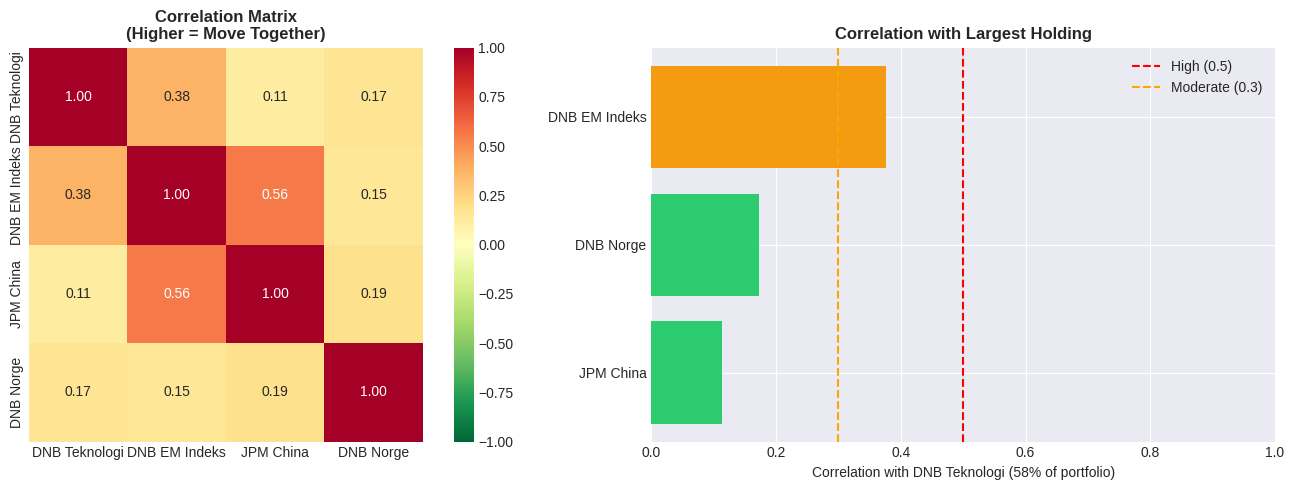

In [7]:
# Setup weights and returns
total_value = sum(info['value'] for info in funds.values())
weights = {name: info['value'] / total_value for name, info in funds.items()}
returns = prices_clean.pct_change().dropna()

# Correlation Matrix
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

corr = returns.corr()
sns.heatmap(corr, annot=True, cmap='RdYlGn_r', center=0, vmin=-1, vmax=1, 
            ax=axes[0], fmt='.2f', square=True)
axes[0].set_title('Correlation Matrix\n(Higher = Move Together)', fontweight='bold')

# Correlation with largest holding
tech_corr = corr['DNB Teknologi'].drop('DNB Teknologi').sort_values()
colors = ['#e74c3c' if x > 0.5 else '#f39c12' if x > 0.3 else '#2ecc71' for x in tech_corr]
axes[1].barh(tech_corr.index, tech_corr.values, color=colors)
axes[1].axvline(x=0.5, color='red', linestyle='--', label='High (0.5)')
axes[1].axvline(x=0.3, color='orange', linestyle='--', label='Moderate (0.3)')
axes[1].set_xlabel('Correlation with DNB Teknologi (58% of portfolio)')
axes[1].set_title('Correlation with Largest Holding', fontweight='bold')
axes[1].legend()
axes[1].set_xlim(0, 1)

plt.tight_layout()
plt.show()

## Max drawdowns

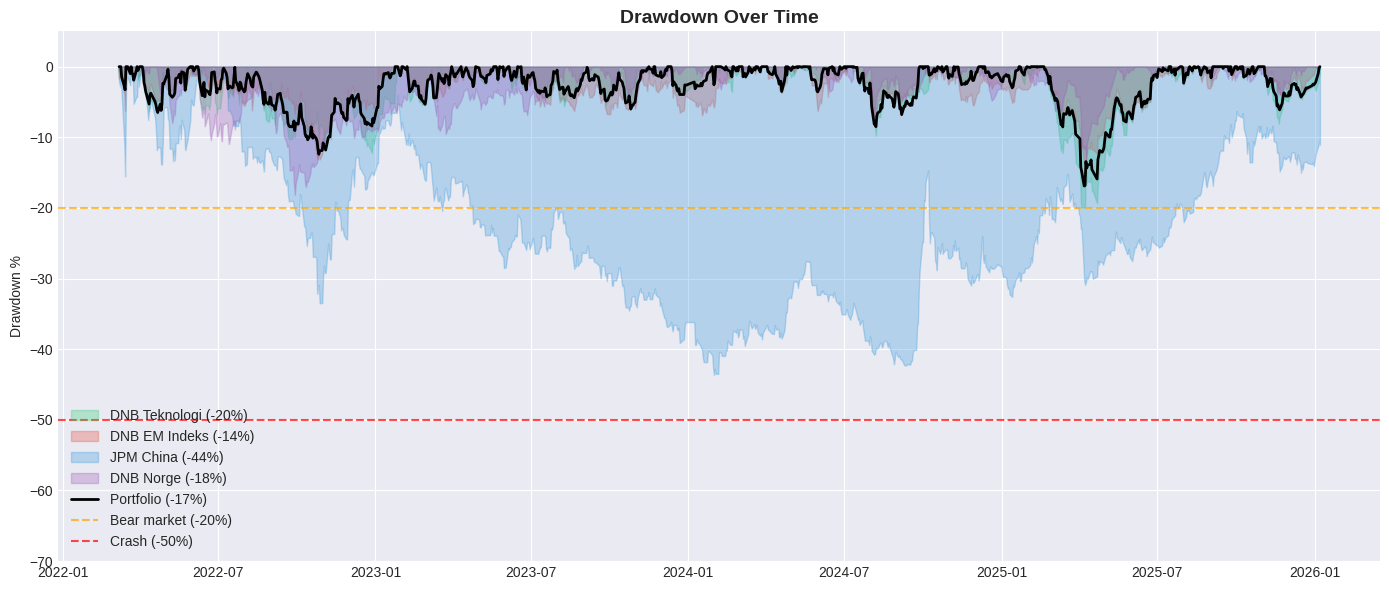

In [9]:
# Drawdown Analysis
normalized = (prices_clean / prices_clean.iloc[0]) * 100

def calc_drawdown_series(series):
    cummax = series.cummax()
    return (series - cummax) / cummax * 100

weights_array = np.array([weights[col] for col in returns.columns])
portfolio_returns = (returns * weights_array).sum(axis=1)
portfolio_value = (1 + portfolio_returns).cumprod() * 100

fig, ax = plt.subplots(figsize=(14, 6))

colors = {'DNB Teknologi': '#2ecc71', 'DNB EM Indeks': '#e74c3c', 
          'JPM China': '#3498db', 'DNB Norge': '#9b59b6'}

for col in normalized.columns:
    dd = calc_drawdown_series(normalized[col])
    ax.fill_between(dd.index, dd, 0, alpha=0.3, label=f'{col} ({dd.min():.0f}%)', color=colors[col])

portfolio_dd = calc_drawdown_series(portfolio_value)
ax.plot(portfolio_dd.index, portfolio_dd, color='black', linewidth=2, label=f'Portfolio ({portfolio_dd.min():.0f}%)')

ax.axhline(y=-20, color='orange', linestyle='--', alpha=0.7, label='Bear market (-20%)')
ax.axhline(y=-50, color='red', linestyle='--', alpha=0.7, label='Crash (-50%)')
ax.set_title('Drawdown Over Time', fontsize=14, fontweight='bold')
ax.set_ylabel('Drawdown %')
ax.legend(loc='lower left')
ax.set_ylim(-70, 5)
plt.tight_layout()
plt.show()